In [2]:
import dataloader
import matplotlib.pyplot as plt

In [3]:
data_path = "C:\\Users\\zxk\\Desktop\\251B\\class-proj\\ucsd-cse-251b-class-competition\\"
city_idx_path = "C:\\Users\\zxk\\Desktop\\251B\\class-proj\\cse251b-project\\"
batch_size = 4
MIA_train_loader,PIT_train_loader,MIA_valid_loader,PIT_valid_loader,MIA_train_dataset,PIT_train_dataset,MIA_valid_dataset,PIT_valid_dataset = dataloader.loadData(data_path,city_idx_path,batch_size,split=0.9,cutoff=None)

Reading city index file...


In [9]:
sample = MIA_train_dataset[0]
print(sample.keys())
# print(sample['car_mask'])

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])


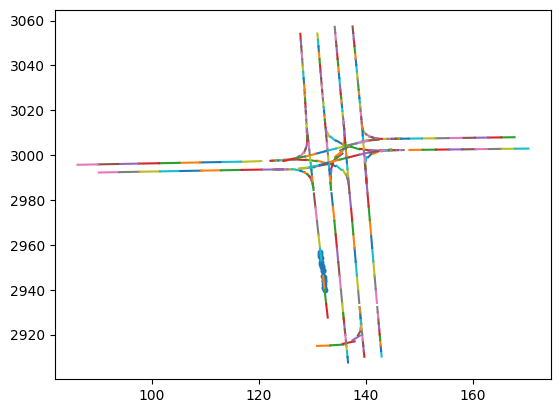

In [6]:
scene_idx = 999
car_idx = 2
sample = MIA_train_dataset[scene_idx]

for i in range(len(sample["lane"])):
    x0,y0 = sample["lane"][i]
    vx,vy = sample["lane_norm"][i]
    # print(vx,vy)
    plt.plot([x0-vx/2,x0+vx/2],[y0-vy/2,y0+vy/2])

plt.scatter(sample["p_in"][car_idx,:,0],sample["p_in"][car_idx,:,1],s = 10)

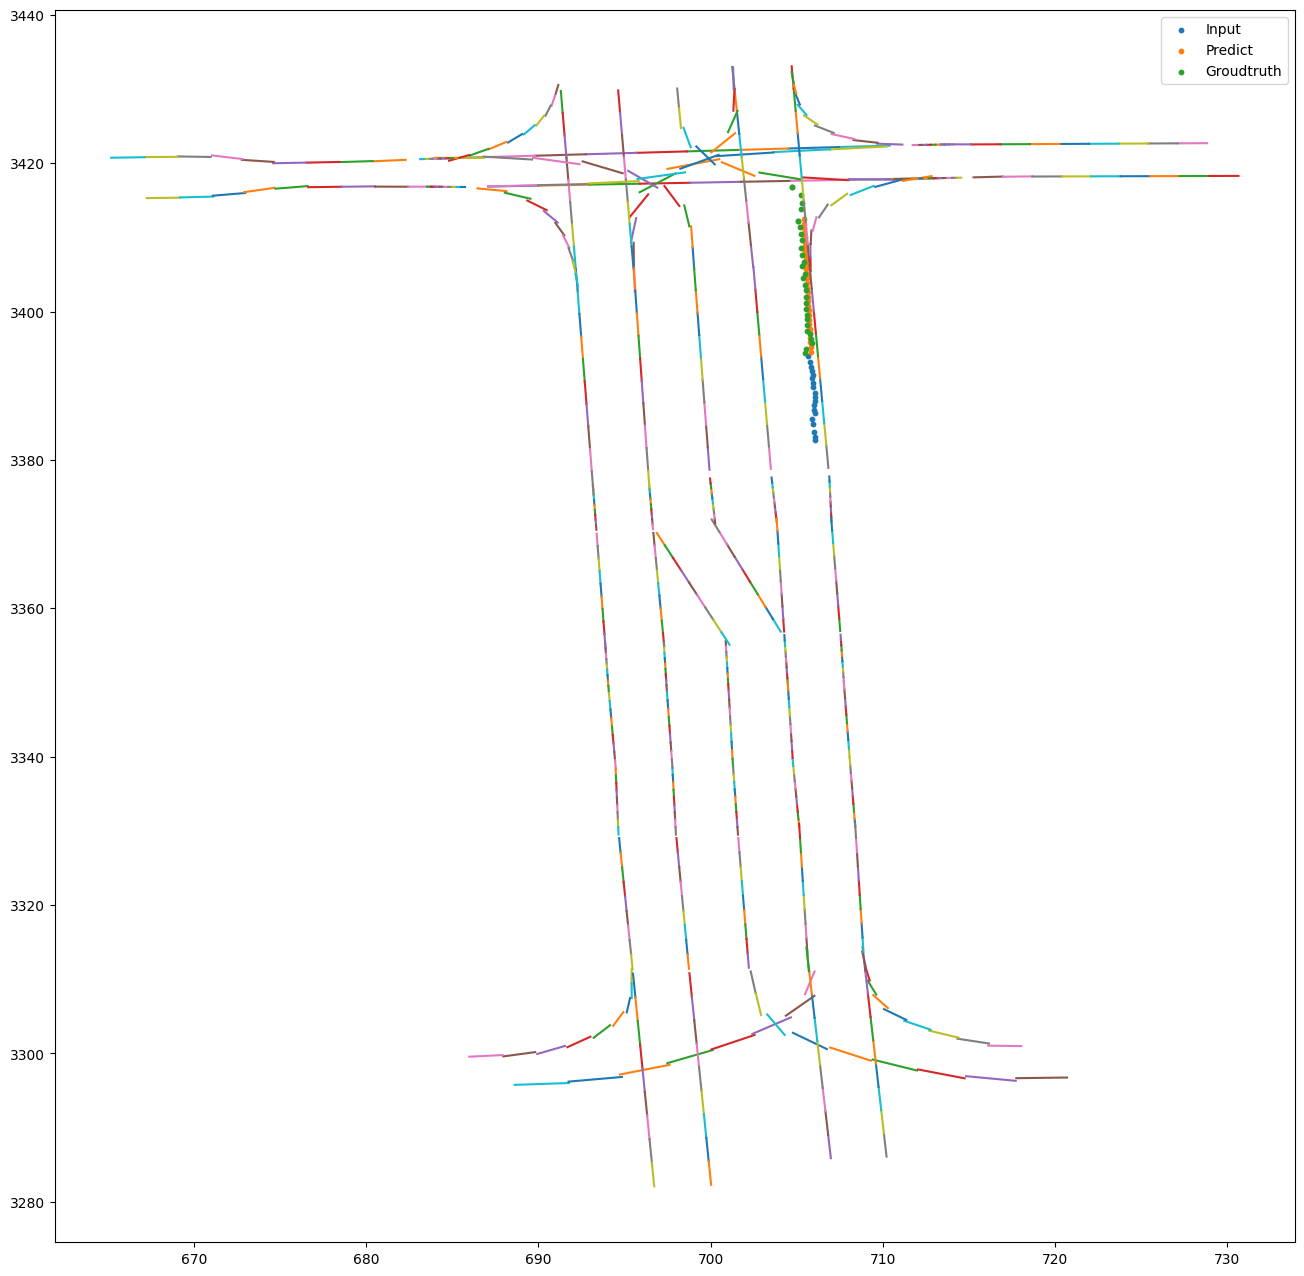

In [12]:
'''visualization'''
import torch
from sklearn.linear_model import LinearRegression

X1 = torch.tensor([i for i in range(19)]).reshape(-1,1)
X2 = torch.tensor([i for i in range(19,49)]).reshape(-1,1)

sample_idx = 99
traj_idx = 3

sample = MIA_valid_dataset[sample_idx]

lrx = LinearRegression()
lry = LinearRegression()

p_in,p_out = sample['p_in'],sample['p_out']

px,py = p_in[traj_idx,:,0],p_in[traj_idx,:,1]
outx,outy = p_out[traj_idx,:,0],p_out[traj_idx,:,1]

lrx.fit(X1,px)
lry.fit(X1,py)
px_pred = lrx.predict(X2)
py_pred = lry.predict(X2)

plt.figure(figsize=(16, 16))

for i in range(len(sample["lane"])):
    x0,y0 = sample["lane"][i]
    vx,vy = sample["lane_norm"][i]
    # print(vx,vy)
    plt.plot([x0-vx/2,x0+vx/2],[y0-vy/2,y0+vy/2])

plt.scatter(px,py,label = "Input",s = 10)

plt.scatter(px_pred,py_pred,label = "Predict",s = 10)

plt.scatter(outx,outy,label = "Groudtruth",s = 10)

plt.legend()

plt.show()